In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# ! pip install pandas
# ! pip install seaborn
# ! pip install numpy
# ! pip install matplotlib
# ! pip install scikit-learn

In [38]:
df = pd.read_csv('./housing.csv')

In [39]:
df.shape

(20640, 10)

In [40]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
df.describe() #shapiro wilkin test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [43]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [44]:
#dropping longitude & latitude columns
df.drop(['longitude','latitude'],axis=1,inplace =True)

In [45]:
# df['total_bedrooms'].isna().sum()

In [46]:
?df.dropna

In [49]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20640 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [52]:
df.head(9)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


In [54]:
df.tail(9)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20631,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# EDA

In [55]:
df.corr() #check correlarion & remove variables to avoid multicollinearity

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


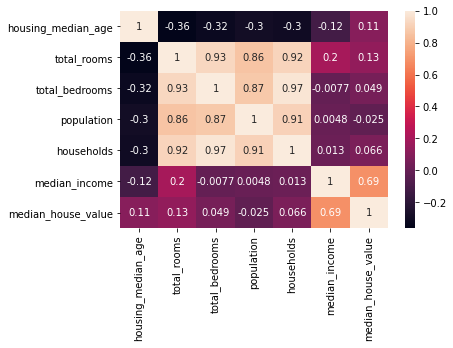

In [56]:
sns.heatmap(df.corr(),annot=True);

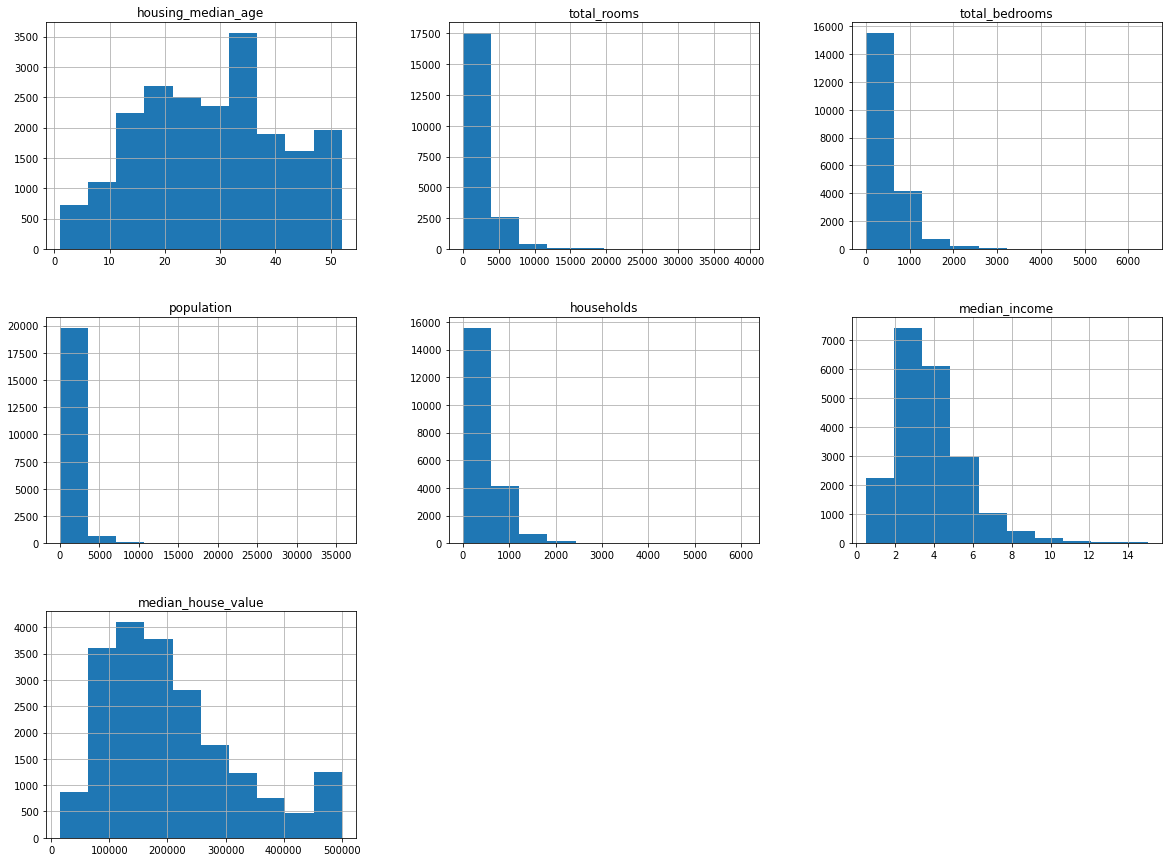

In [57]:
df.hist(figsize=(20,15));

### We can see that only median house age is normally distributed rest all are right skewed

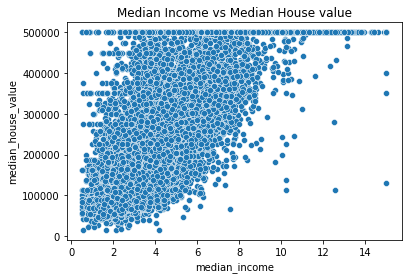

In [58]:
sns.scatterplot(data=df,x='median_income',y='median_house_value')
plt.title('Median Income vs Median House value');

#### Above plot tells us that there is a positive relation b/w the median income and median house value telling us that more the income of the houseolds , they buy expensive property

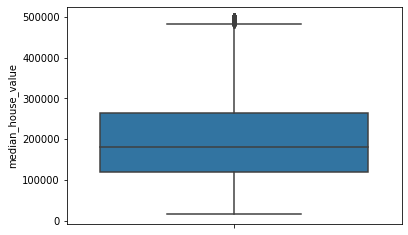

In [59]:
sns.boxplot(data=df,y='median_house_value'); #let's see the box plot to see the mean house price 

In [60]:
df['median_house_value'].mean()

206855.81690891474

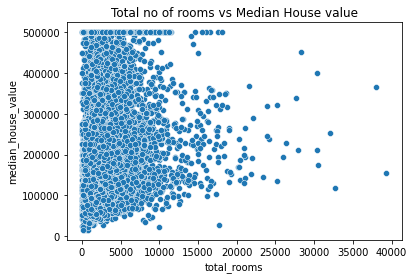

In [61]:
sns.scatterplot(data=df,x='total_rooms',y='median_house_value')
plt.title('Total no of rooms vs Median House value');

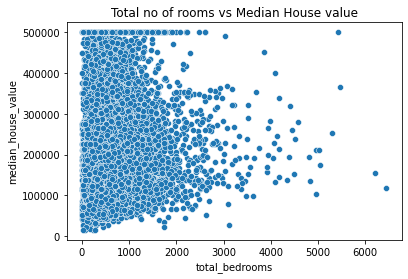

In [62]:
sns.scatterplot(data=df,x='total_bedrooms',y='median_house_value')
plt.title('Total no of rooms vs Median House value');

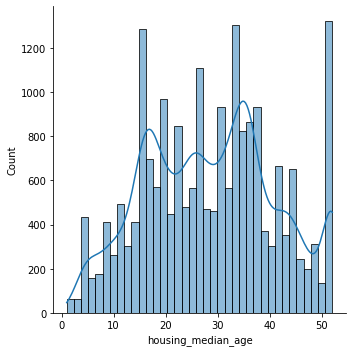

In [63]:
# Let's see the distribution of of the Median house age
sns.displot(data=df,x='housing_median_age',kde=True);

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

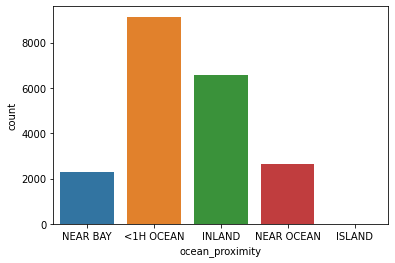

In [64]:
sns.countplot(data=df,x='ocean_proximity');
df['ocean_proximity'].value_counts()

In [65]:
house_near_onehocean = df[df['ocean_proximity'] == '<1H OCEAN']
house_near_onehocean.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,9136.000000,9136.000000,9136.000000,9136.000000,9136.000000,9136.000000,9136.000000
mean,29.279225,2628.343586,546.442403,1520.290499,517.744965,4.230682,240084.285464
std,11.644453,2160.463696,425.516689,1185.848357,392.280718,2.001223,106124.292213
min,2.000000,11.000000,5.000000,3.000000,4.000000,0.499900,17500.000000
25%,20.000000,1464.000000,304.000000,857.750000,293.000000,2.864900,164100.000000
50%,30.000000,2108.000000,442.000000,1247.000000,421.000000,3.875000,214850.000000
75%,37.000000,3141.000000,648.000000,1848.000000,617.000000,5.180500,289100.000000
max,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [66]:
df.groupby('ocean_proximity').mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.442403,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.915109,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.389699,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.607267,1354.008653,501.244545,4.005785,249433.977427


### Let's seperate the data by ocean proxmity and then see detailed information to gain insight

In [67]:
house_near_inland = df[df['ocean_proximity'] == 'INLAND']
house_near_inland.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000,6551.000000
mean,24.271867,2717.742787,533.915109,1391.046252,477.447565,3.208996,124805.392001
std,12.018020,2385.831111,444.240965,1168.670126,392.252095,1.437465,70007.908494
min,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900,14999.000000
25%,15.000000,1404.000000,283.000000,722.000000,254.000000,2.188950,77500.000000
50%,23.000000,2131.000000,426.000000,1124.000000,385.000000,2.987700,108500.000000
75%,33.000000,3216.000000,633.500000,1687.000000,578.000000,3.961500,148950.000000
max,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000


In [68]:
house_near_bay = df[df['ocean_proximity'] == 'NEAR BAY']
house_near_bay.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,37.730131,2493.589520,514.389699,1230.317467,488.616157,4.172885,259212.311790
std,13.070385,1830.817022,366.283515,885.899035,350.598369,2.017427,122818.537064
min,2.000000,8.000000,1.000000,8.000000,1.000000,0.499900,22500.000000
25%,29.000000,1431.250000,290.000000,718.250000,275.000000,2.834750,162500.000000
50%,39.000000,2083.000000,425.500000,1033.500000,406.000000,3.818650,233800.000000
75%,52.000000,3029.750000,626.000000,1495.000000,599.250000,5.054425,345700.000000
max,52.000000,18634.000000,3226.000000,8276.000000,3589.000000,15.000100,500001.000000


In [69]:
house_near_ocean = df[df['ocean_proximity'] == 'NEAR OCEAN']
house_near_ocean.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000
mean,29.347254,2583.700903,538.607267,1354.008653,501.244545,4.005785,249433.977427
std,11.840371,1990.724760,374.189521,1005.563166,344.445256,2.010558,122477.145927
min,2.000000,15.000000,3.000000,8.000000,3.000000,0.536000,22500.000000
25%,20.000000,1505.000000,314.250000,778.500000,299.000000,2.630525,150000.000000
50%,29.000000,2195.000000,468.000000,1136.500000,429.000000,3.647050,229450.000000
75%,37.000000,3109.000000,662.750000,1628.000000,614.000000,4.837400,322750.000000
max,52.000000,30405.000000,4585.000000,12873.000000,4176.000000,15.000100,500001.000000


In [27]:
house_near_island = df[df['ocean_proximity'] == 'ISLAND']
house_near_island.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,42.400000,1574.600000,420.400000,668.000000,276.600000,2.74442,380440.000000
std,13.164346,707.545264,169.320111,301.691067,113.200265,0.44418,80559.561816
min,27.000000,716.000000,214.000000,341.000000,160.000000,2.15790,287500.000000
25%,29.000000,996.000000,264.000000,422.000000,173.000000,2.60420,300000.000000
50%,52.000000,1675.000000,512.000000,733.000000,288.000000,2.73610,414700.000000
75%,52.000000,2127.000000,521.000000,744.000000,331.000000,2.83330,450000.000000
max,52.000000,2359.000000,591.000000,1100.000000,431.000000,3.39060,450000.000000


#### 1.After seperating the category by the ocean proximity we can see the average housel value and we can tell that houses located near Island are expensive which also justifies because island mostly being a vacation place has higher value of houses. But we cant rely on this data as we have information just 5 houses in this category, so to have clear idea of thus we might need more data.

#### 2.Other than this we can see that houses located at the Bay area are expensive than houses of other areas.

#### 3.So we can say that the location of house from nearby oceans plays vital role in prices of the houses.

#### 4.There is very little positive relation as seen from plots, between the total no of rooms and bedrooms within a block and the price of the houses.

## Feature Selection 

In [70]:
X = df.drop('median_house_value',axis=1)

In [71]:
X = pd.get_dummies(data=X)
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [72]:
X['ocean_proximity_<1H_OCEAN'] = X['ocean_proximity_<1H OCEAN']

In [73]:
X = X.drop('ocean_proximity_<1H OCEAN',axis=1)

In [74]:
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_<1H_OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0,0


In [169]:
X.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'ocean_proximity_<1H_OCEAN'],
      dtype='object')

In [170]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [75]:
print('Shape of input features',X.shape) # 2D array

Shape of input features (20640, 11)


In [76]:
y = df['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [77]:
print('Shape of input features',y.shape)

Shape of input features (20640,)


In [78]:
y.values # 1D array

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 )

## Model Creation

In [149]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [150]:
house_price_model = LinearRegression()

#### Training model on training data

In [151]:
house_price_model.fit(X_train,y_train)

LinearRegression()

### Predicting the house values on test data

In [152]:
y_predictions = house_price_model.predict(X_test)
y_predictions


array([ 64482.64114444, 103960.02833241, 269252.93446246, ...,
       116943.84814351, 123715.63121838, 217340.93766412])

### Now that we have predicted the test data using the model we need to find out the accuracy of this model and find out whether Linear Regerssion was best algo for this data

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [154]:
y_test.mean()

207245.9655020552

In [155]:
#df['median_house_value'].mean()

In [156]:
y_predictions.mean()

206628.83951916796

In [157]:
mean_absolute_error(y_test,y_predictions)

50868.912412412436

In [158]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_test,y_predictions)

28.957518349971217

#### So we after calculating MAPE we found out that we are off by or we have 28.9% i.e. 29% as error rate

#### So is that error acceptable - it depends on context and consider our scenario - 29 % error is surely not  completely acceptable but it can give us a fair idea about the prices of the houses

In [159]:
np.sqrt(mean_squared_error(y_test,y_predictions))

70105.86070518458

##### We can that we have a high RMSE than our MAE, whcih suggests that for most of the data the predicted value is having fair accuracy but for few points/data features the predicted house value is havng very high errors

In [ ]:
from sklearn.metrics import r2_score,r

In [160]:
#### Accuracy of the model
r2_score(y_test,y_predictions)

0.6311825084716516

In [161]:
X.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'ocean_proximity_<1H_OCEAN'],
      dtype='object')

So our model accuracy is 63%

In [162]:
house_price_model.coef_

array([ 1.20038215e+03, -7.18719314e+00,  8.50443043e+01, -3.58253974e+01,
        6.97236538e+01,  4.03724642e+04, -9.27051032e+04,  1.48896128e+05,
       -2.13116993e+04, -1.08965384e+04, -2.39827874e+04])

In [163]:
house_price_model.intercept_

49216.063972250646

#### Now we want to know if the underlying dataset was a valid dataset for Linear Regression , by checking the residual plots if there was a sttrange pattern that we coul not see in some multidimensional level

#### Let's visualize the residual plots to see that 

In [164]:
test_residuals = y_test - y_predictions

In [165]:
test_residuals

20046    -16782.641144
3024     -58160.028332
15663    230748.065538
20484    -55926.430429
9814      27874.989828
             ...      
15316     26831.545431
14772    -72833.347593
12870     -9943.848144
13476      6984.368782
16123     89759.062336
Name: median_house_value, Length: 6812, dtype: float64

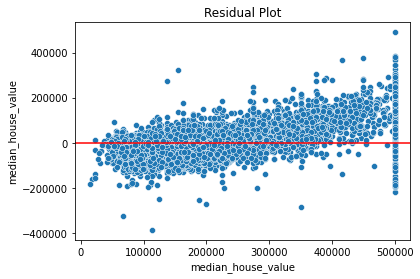

In [166]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')
plt.title('Residual Plot');

### We can see that the data residual plot shows us that the points are normally distributed along the line, so we can conclude that the underlying dataset a valid choice for Linear Regression.

### As for the low model accuracy, it might be because of less data and also in model coefficients we have some negative coefficients values which we can remove to get better accuracy.

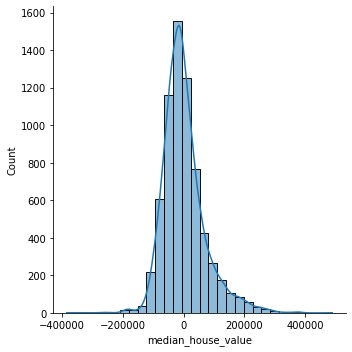

In [167]:
sns.displot(test_residuals,bins=30,kde=True);

### Even the distribution tells us that the errors/residuals are somewhat distributed normally and also the kde shows us that the mean is pretty close to zero

### Also we can see there is undershoot of a little bit but having a little bit skewed on one way or the other is not too bad.

### Saving the model

In [171]:
# from joblib import dump #pkl,ckpt

In [59]:
# dump(house_price_model,'House_prediction_model.joblib')

['House_prediction_model.joblib']

In [172]:

# model=joblib.load(model_path)
# model.predict(x,y)